# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [109]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [110]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        ### your implementation for bubble sort goes here
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        
        for i in range(n):
            for j in range(n - i - 1):
                if self.sorted_items[j] > self.sorted_items[j + 1]:
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]
                    
    def get_sorted(self,):
        return self.sorted_items

In [111]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here         
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)

        for index in range(1, n):
            while index > 0 and self.sorted_items[index] < self.sorted_items[index-1]:
                self.sorted_items[index],self.sorted_items[index-1] = self.sorted_items[index-1],self.sorted_items[index]
                index -= 1
            

    def get_sorted(self,):
        return self.sorted_items

In [112]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        
        ### your implementation for insertion sort goes here    
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        
        for i in range(n-1):
            smallest_index = i
            for j in range(i+1, n):
                if self.sorted_items[j] < self.sorted_items[smallest_index]:
                    smallest_index = j
            self.sorted_items[i], self.sorted_items[smallest_index] = self.sorted_items[smallest_index], self.sorted_items[i]   

    def get_sorted(self,):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [113]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

#list0 = create_custom_list(100,1000)
#print(list0)
#found1 = BubbleSort(list0)
#found2 = InsertionSort(list0)
#found3 = SelectionSort(list0)
#print(found1.get_sorted())
#print(found2.get_sorted())
#print(found3.get_sorted())
#print(found1.get_sorted() == found2.get_sorted() and found1.get_sorted() ==  found3.get_sorted())

In [114]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

[767, 441, 984, 24, 326, 211, 496, 52, 662, 48, 623, 992, 11, 812, 517, 945, 313, 79, 146, 668]
Avg :  0.00015703028000132235


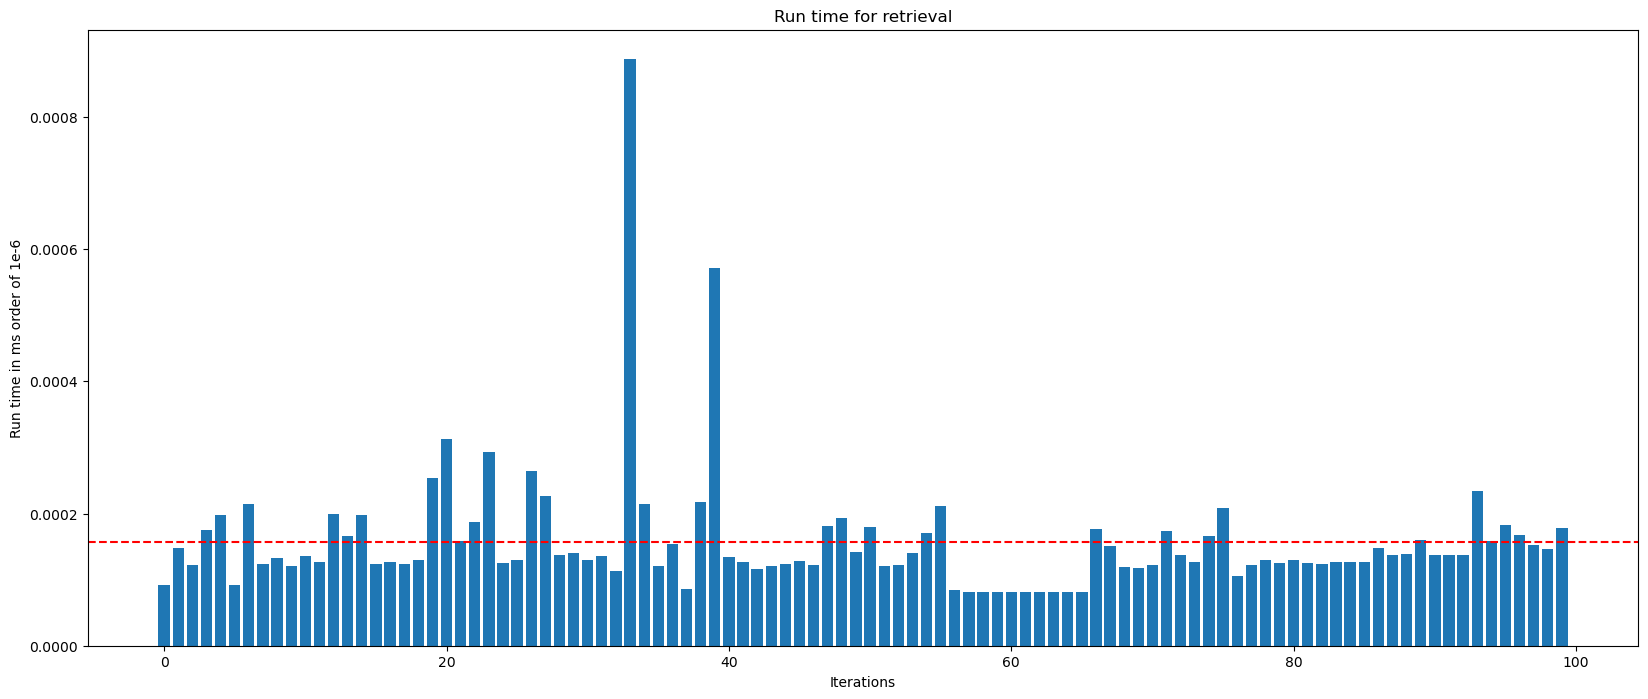

In [13]:
runs = 100
my_list=create_custom_list(20,1000)
print(my_list)

### Bubble sort experiment code goes here
run_times = []
for _ in range(runs):
    start = timeit.default_timer()
    found = BubbleSort(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)
avg1 = sum(run_times)/len(run_times)
print("Avg : ", avg1)
draw_plot(run_times)

[767, 441, 984, 24, 326, 211, 496, 52, 662, 48, 623, 992, 11, 812, 517, 945, 313, 79, 146, 668]
Avg :  0.00012980282999876635


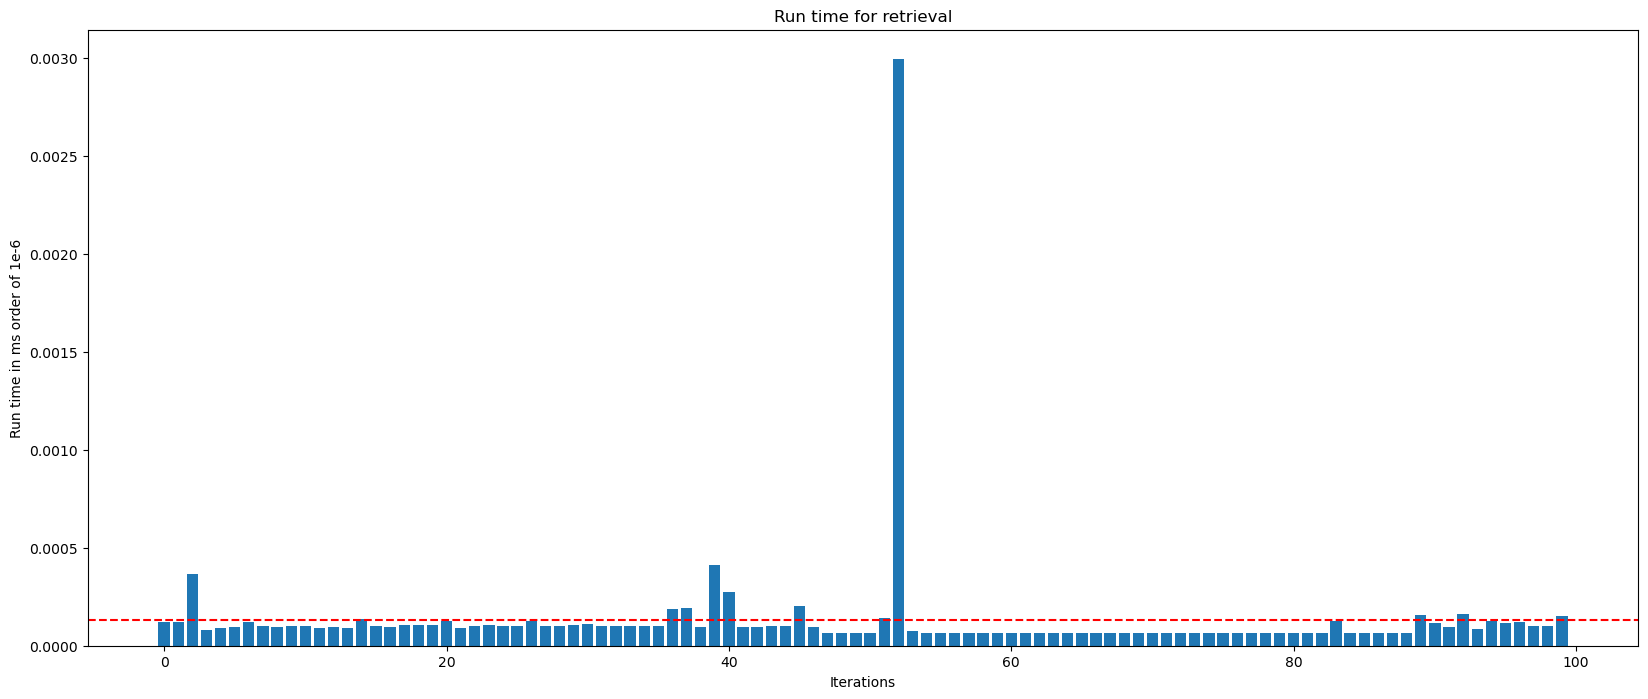

In [14]:
### Insertion sort experiment code goes here
run_times = []
print(my_list)
for _ in range(runs):
    start= timeit.default_timer()
    found = InsertionSort(my_list)
    stop=timeit.default_timer()
    run_times.append(stop-start)
avg2 = sum(run_times)/len(run_times)
print("Avg : ", avg2)

draw_plot(run_times)


[767, 441, 984, 24, 326, 211, 496, 52, 662, 48, 623, 992, 11, 812, 517, 945, 313, 79, 146, 668]
Avg :  9.521975999916776e-05


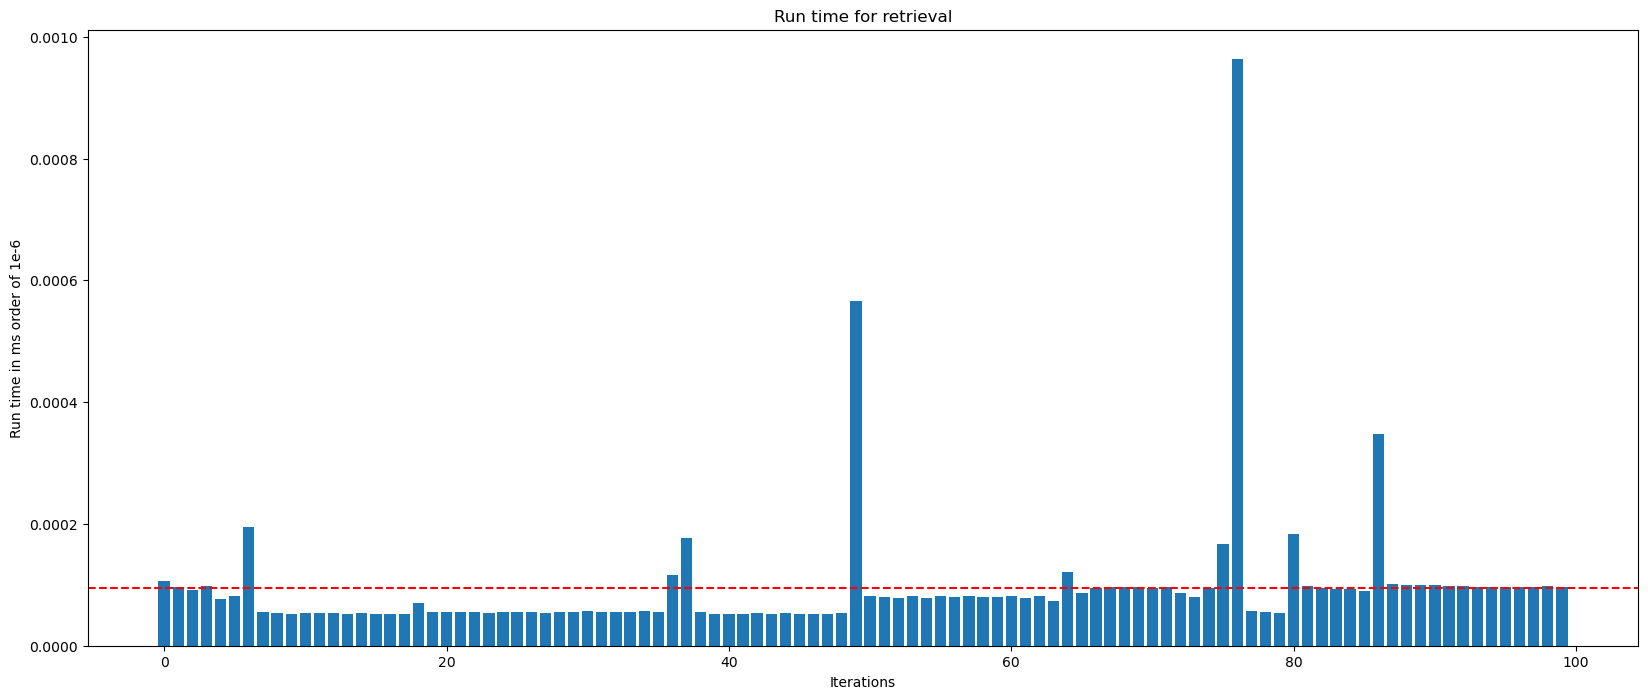

9.521975999916776e-05 < 0.00015703028000132235


In [15]:
### Selection sort experiment code goes here
run_times = []
print(my_list)
for _ in range(runs):
    start= timeit.default_timer()
    found = SelectionSort(my_list)
    stop=timeit.default_timer()
    run_times.append(stop-start)
avg3 = sum(run_times)/len(run_times)
print("Avg : ", avg3)
draw_plot(run_times)

#comparison
avg = [avg1, avg2, avg3]
print(min(avg), "<", max(avg))

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


While the three sorting algorythms all have the worst time complexity of O(n^2), Insertion Sort and Selection Sort had much bettter time complexity than Bubble Sort. This is because Bubble Sort deals with larger datasets. Insertion Sort and Selection Sort have similar time complexities, but their actual performance can vary based on the input data. The efficiency of sorting algorithms is influenced by factors such as the initial order and size of the list, and their design of algorithm.

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

Text(0, 0.5, 'Run time')

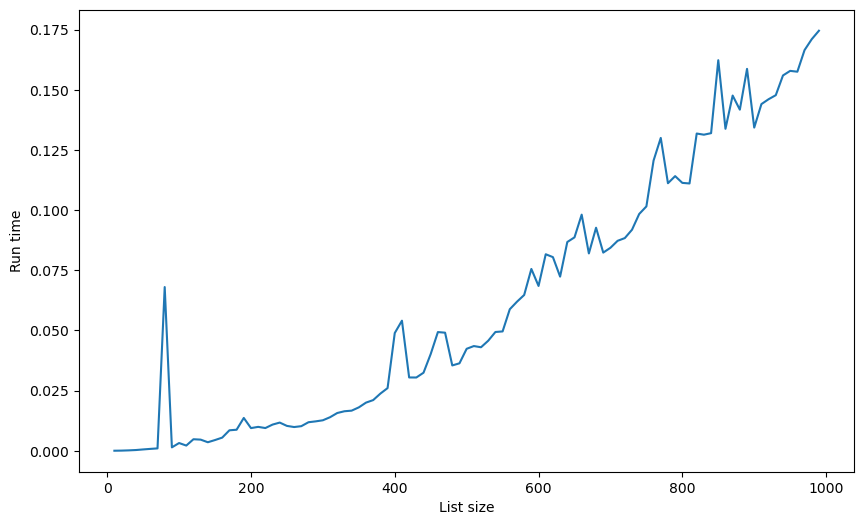

In [19]:
### Bubble sort experiment code goes here
my_list = create_custom_list(1000,1000)
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = BubbleSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

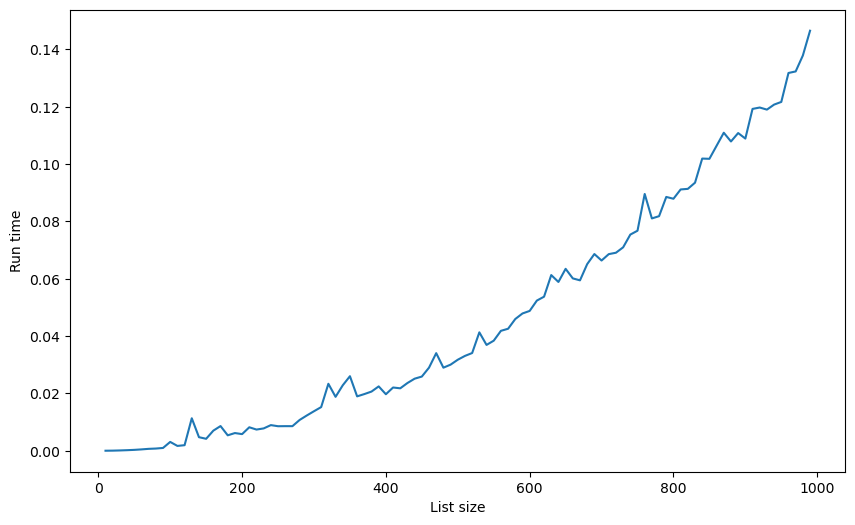

In [20]:
### Insertion sort experiment code goes here
N = 100
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = InsertionSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')






Text(0, 0.5, 'Run time')

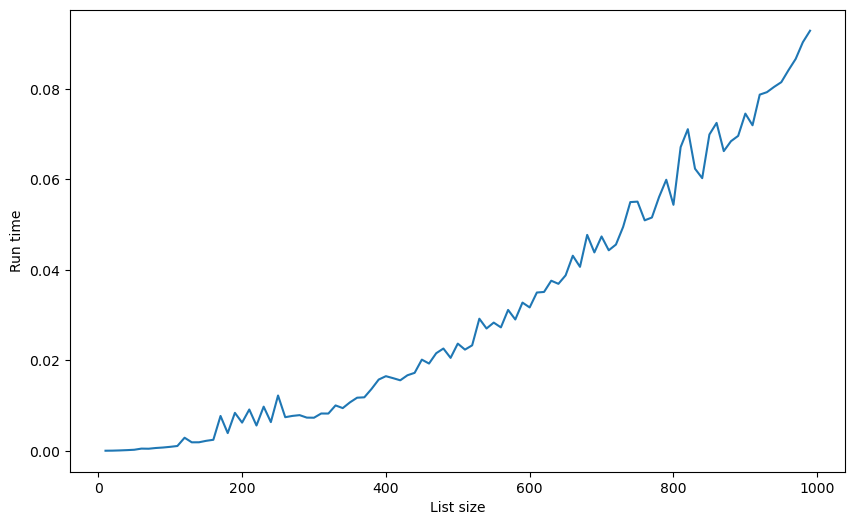

In [21]:
### Selection sort experiment code goes here
run_times = []
lengths = []
for length in range(10, 1000, 10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = SelectionSort(aux)
    stop=timeit.default_timer()
    run_times.append(stop-start)
    lengths.append(length)
    
plt.figure(figsize=(10, 6))
plt.plot(lengths, run_times)
plt.xlabel('List size')
plt.ylabel('Run time')

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

All three line graphs are the graph of exponential functions, which corresponds with their average time complexity of O(n^2). Selection Sort was by far the fastest compared to the other two because it minimizes the number of swaps by directly selecting the smallest element in each iteration, resulting in fewer overall operations. 

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

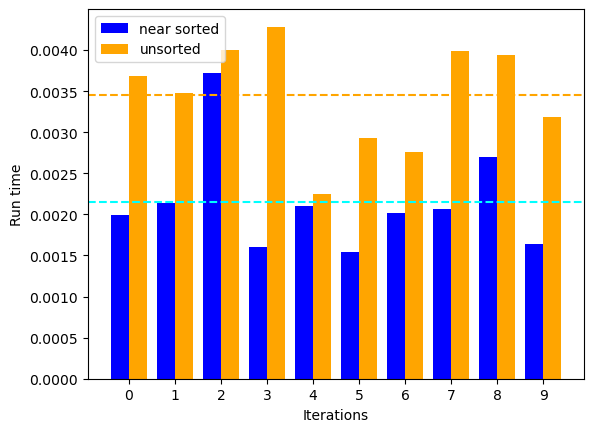

In [32]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
 
# Function to perform quicksort
def quicksort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
 
        quicksort(array, low, pi - 1)
        quicksort(array, pi + 1, high)
  
def create_near_sorted_list(length, max_value):
    array=create_custom_list(length-3,max_value)
    quicksort(array, 0, len(array) - 1)
    unsortedArray = create_custom_list(3,max_value)
    return(array + unsortedArray)
    
### Bubble sort experiment code goes here

r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = BubbleSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = BubbleSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()



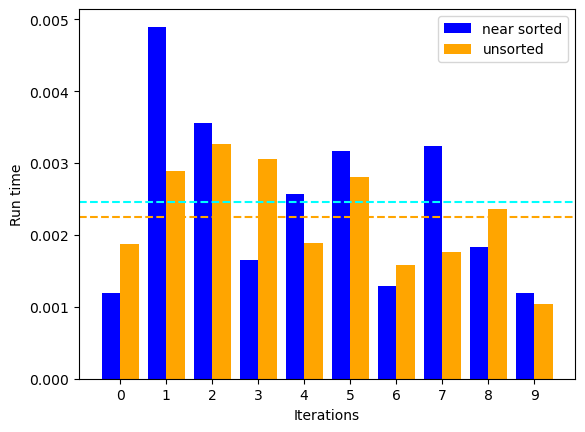

In [33]:
### Selection sort experiment code goes here
r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = SelectionSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = SelectionSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()

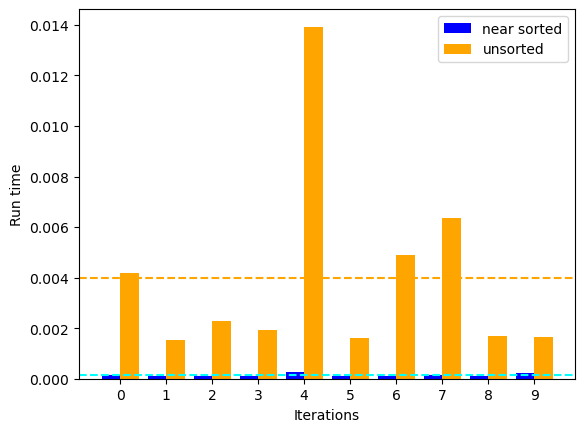

In [34]:
### Insertion sort experiment code goes here
r1 = []
r2 = []
list1 = create_near_sorted_list(100,100)
list2 = create_custom_list(100,100)

for _ in range(10):
    start = timeit.default_timer()
    found = InsertionSort(list1)
    stop = timeit.default_timer()
    r1.append(stop-start)

    start = timeit.default_timer()
    found = InsertionSort(list2)
    stop = timeit.default_timer()
    r2.append(stop-start)
    
x_values = [i for i in range(10)]
x_axis = np.arange(10)
plt.bar(x_axis-0.2, r1, 0.4, label='near sorted', color='blue')
plt.bar(x_axis+0.2, r2, 0.4, label='unsorted', color='orange')
plt.axhline(np.mean(r1),color="cyan",linestyle="--")
plt.axhline(np.mean(r2),color="orange",linestyle="--")
plt.xticks(x_axis, x_values) 
plt.xlabel('Iterations')
plt.ylabel('Run time')
plt.legend()
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

My expectation was that the search on near sorted lists would be much faster than on unsorted lists. It was true for Bubble Sort and Insertion Sort. For Bubble Sort, the number of swapping was much less for near sorted lists. For Insertion Sort, the item to be inserted is often bigger than its sorted part so the whole while loop can be skipped, which results in much better time complexity compared to unsorted lists. But, my guess didn't apply to Selection Sort. This is because it still has to conduct linear search on the unsorted part to find the minimum element and the number of swapping does not change.

### Part B

In the class, we discussed three implementations of Binary Search. 

In [16]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [17]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [18]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

item :  898


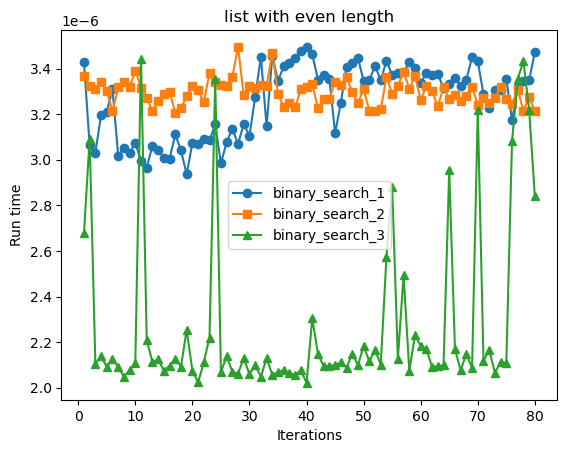

item :  898


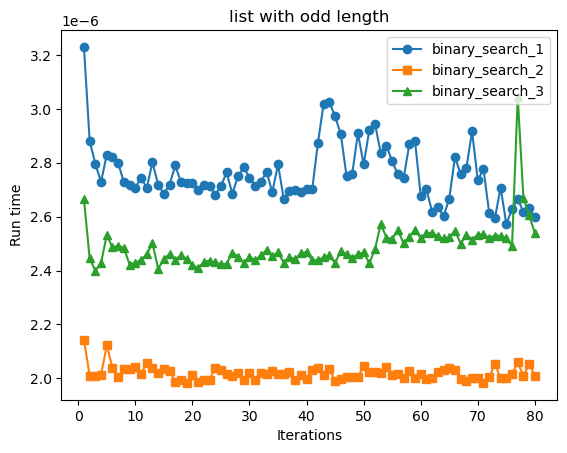

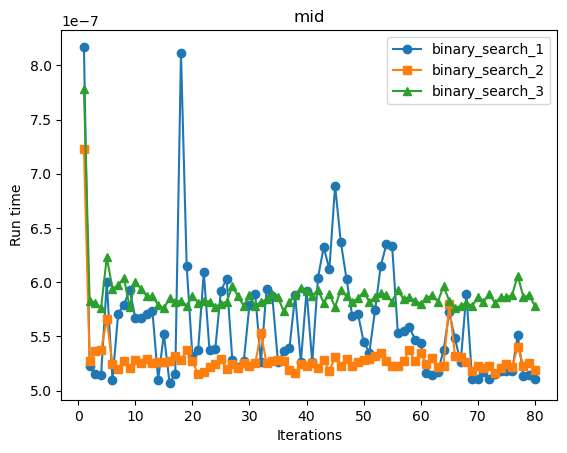

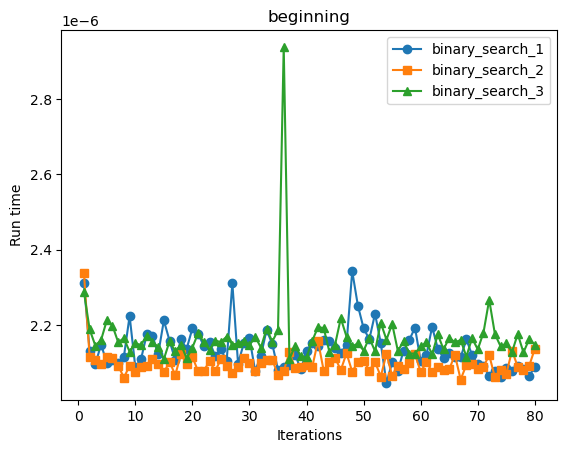

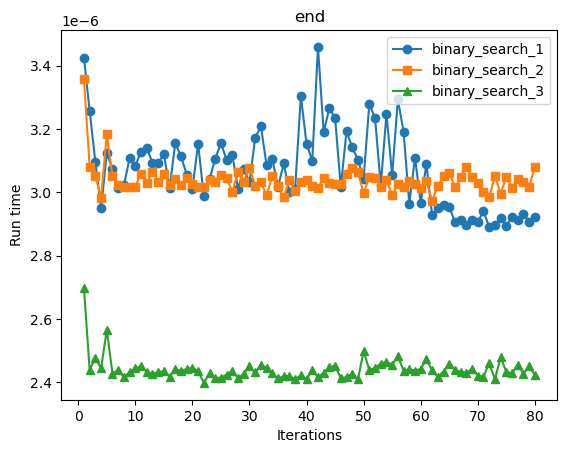

In [55]:
def run_times(binary_search, search_list, to_find, bound):
    run_times = []
    while len(run_times) < 81:
        start = timeit.default_timer()
        found = binary_search(search_list, to_find)
        stop = timeit.default_timer()
        if (stop - start) < bound:
            run_times.append(stop-start)
    return run_times

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1,81)]
    plt.figure()
    plt.plot(x_values, y1[1:], label="binary_search_1", marker='o')
    plt.plot(x_values, y2[1:], label="binary_search_2", marker='s')
    plt.plot(x_values, y3[1:], label="binary_search_3", marker='^')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

# list with even length
even_list = [i for i in range(1000)] # length = 1000
to_find = random.randint(0, 999)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, even_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, to_find, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'list with even length')

# list with odd length
odd_list = [i for i in range(1001)] # length = 1001
print("item : ", to_find)
run_times1 = run_times(binary_search_1, odd_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, odd_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, odd_list, to_find, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'list with odd length')

# mid
run_times1 = run_times(binary_search_1, even_list, 499, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 499, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 499, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'mid')

# beginning
run_times1 = run_times(binary_search_1, even_list, 0, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 0, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 0, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'beginning')

# end
run_times1 = run_times(binary_search_1, even_list, 999, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 999, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 999, 3.5e-6)
draw_3_graphs(run_times1, run_times2, run_times3, 'end')

**Reflection**:

I defined two functions to avoid redundancy in each experiment and also set up an upper bound of run time so that the graphs can be more visible. Here's the observations of each experiment.

[even] The result depended on where the index of item is. When it's at the beginning of the list, binary_search_3 was the fastest.

[odd] The result also depended on the position of item. The run time was fairly faster than the list of even length.

[mid] When the item was at the middle, binary_search_3 was the slowest because it has "item_list[mid] == to_find" as the last condition while it's the first condition for binary_search_1 and binary_search_2.

[beginning] binary_search_2 was the fastest due to the assignment "upper = mid - 1", not "upper = mid" or "right = mid".

[end] binary_search_3 was by far the fastest because it has "item_list[mid] < to_find" as the first condition.

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [25]:
def binary_search_4(item_list, to_find):
    mid = (len(item_list)-1) // 2
    if item_list[mid] < to_find:
        return binary_search_4(item_list[(mid+1):], to_find)
    elif item_list[mid] > to_find:
        return binary_search_4(item_list[:mid], to_find)
    else:
        return True

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

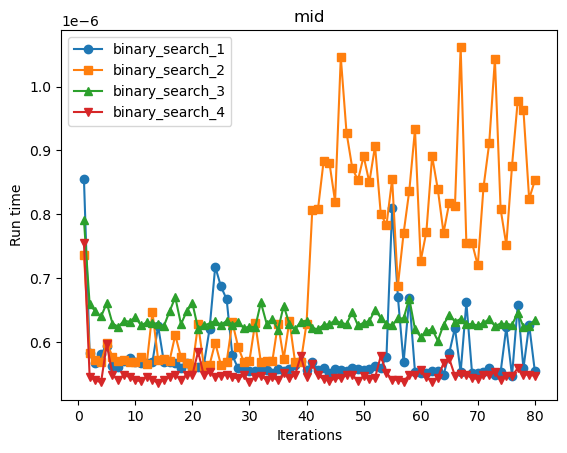

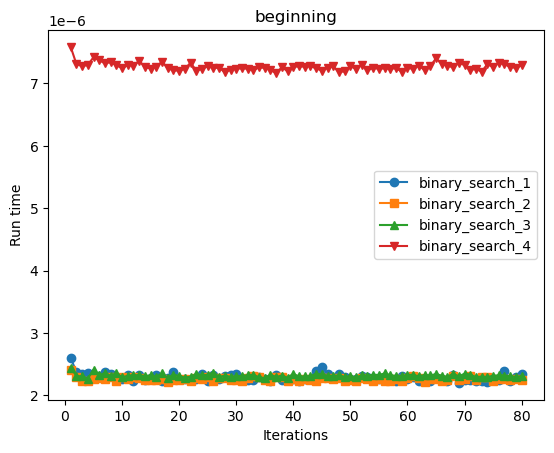

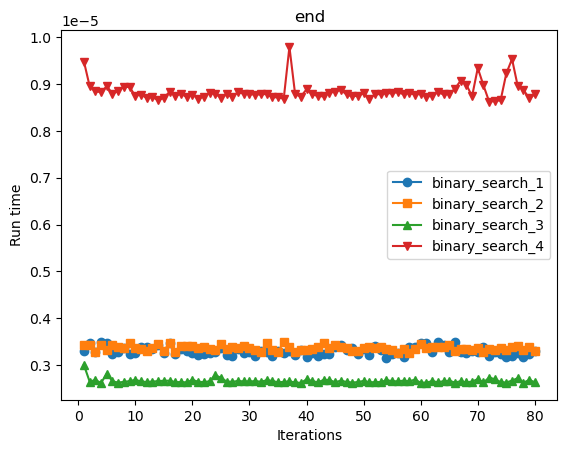

item :  837


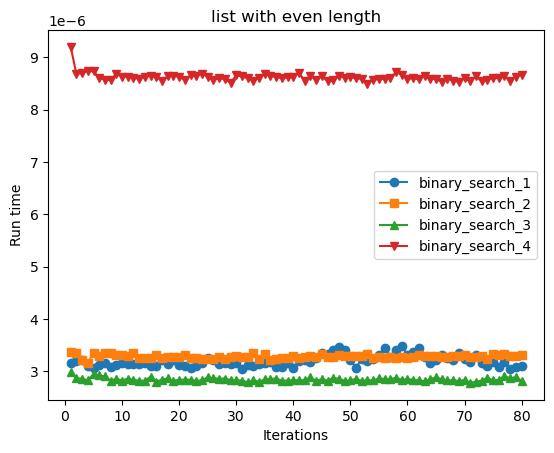

item :  822


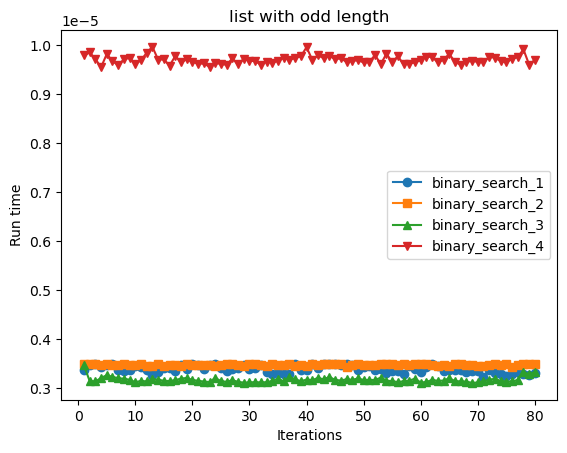

index of item :  705


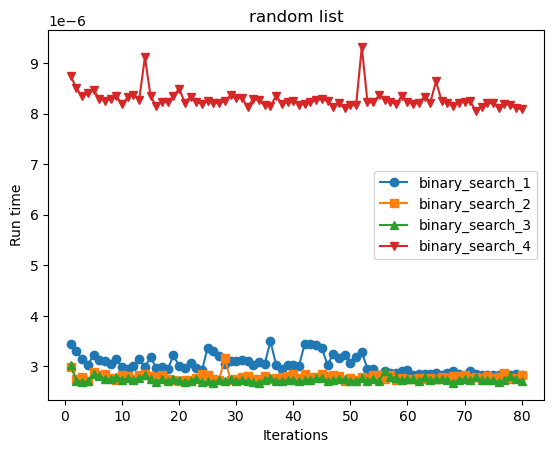

In [57]:
# your implementation and experiments go here.
def draw_4_graphs(y1, y2, y3, y4, title):
    x_values = [i for i in range(1,81)]
    plt.figure()
    plt.plot(x_values, y1[1:], label='binary_search_1', marker='o')
    plt.plot(x_values, y2[1:], label='binary_search_2', marker='s')
    plt.plot(x_values, y3[1:], label='binary_search_3', marker='^')
    plt.plot(x_values, y4[1:], label='binary_search_4', marker='v')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()
    
# mid
run_times1 = run_times(binary_search_1, even_list, 499, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 499, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 499, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 499, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'mid')
    
# beginning
run_times1 = run_times(binary_search_1, even_list, 0, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 0, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 0, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 0, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'beginning')

# end
run_times1 = run_times(binary_search_1, even_list, 999, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, 999, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, 999, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, 999, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'end')

# list with even length
to_find = random.randint(0, 999)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, even_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, even_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, even_list, to_find, 3.5e-6)
run_times4 = run_times(binary_search_4, even_list, to_find, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'list with even length')

# list with odd length
to_find = random.randint(0, 1000)
print("item : ", to_find)
run_times1 = run_times(binary_search_1, odd_list, to_find, 3.5e-6)
run_times2 = run_times(binary_search_2, odd_list, to_find, 3.5e-6)
run_times3 = run_times(binary_search_3, odd_list, to_find, 3.5e-6)
run_times4 = run_times(binary_search_4, odd_list, to_find, 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'list with odd length')

# random list
random_list = sorted(create_custom_list(1000, 10000))
to_find = random.randint(0, 999)
print("index of item : ", to_find)
run_times1 = run_times(binary_search_1, random_list, random_list[to_find], 3.5e-6)
run_times2 = run_times(binary_search_2, random_list, random_list[to_find], 3.5e-6)
run_times3 = run_times(binary_search_3, random_list, random_list[to_find], 3.5e-6)
run_times4 = run_times(binary_search_4, random_list, random_list[to_find], 1e-5)
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'random list')


##### Result Discussion:

In general, binary_search_4 was much slower than the other three. However, when the item is right at the middle, it was faster than the other three searches. This is because, there's a condition for the while loop in other three searches, like "lower <= upper", which doesn't exist in binary_search_4. Therefore, it can go staright into the if statements.

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [115]:
# your implementation and experiments go here.

# HeapSort
def heapify(arr, N, i):
    largest = i  
    l = 2 * i + 1     
    r = 2 * i + 2     

    if l < N and arr[largest] < arr[l]:
        largest = l
    if r < N and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)
    for i in range(N // 2 - 1, -1, -1):
        heapify(arr, N, i)
    for i in range(N - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)
    return arr  # Return the sorted list

# MergeSort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
 
        mergeSort(L)
        mergeSort(R)
 
        i = j = k = 0
 
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
            
    return arr

# QuickSort 
def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)
        
    return arr

def partition(arr, low, high):
    i = low - 1
    pivot = arr[high]

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

# HeapSort
# Reason for implementation: 
# The heapify() function correctly maintains the heap property, ensuring that the largest element is at the root of the heap.
# The heapSort() function first builds a max heap using heapify, then repeatedly extracts the maximum element from the heap, 
# swapping it with the last unsorted element, and then heapifying the reduced heap.

# MergeSort
# Reason for implementation: 
# The mergeSort() function divides the array into two halves, recursively sorts the two halves, and then merges the sorted halves.
# This implementation uses a simple recursive approach, which is easy to understand and implement. 

# QuickSort 
# Reason for implementation: 
# The quicksort() function recursively partitions the array into smaller subarrays based on a pivot element and then 
# sorts the subarrays independently. This implementation follows the Hoare partition scheme.
# This implementation is concise and follows a widely-used partitioning scheme, making it efficient and easy to understand.

Heap Sort


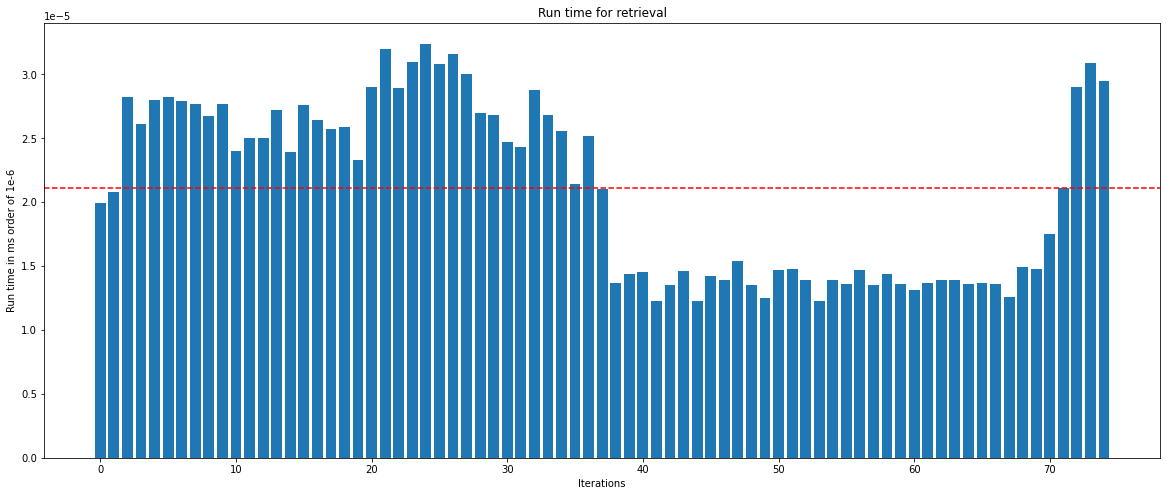

Merge Sort


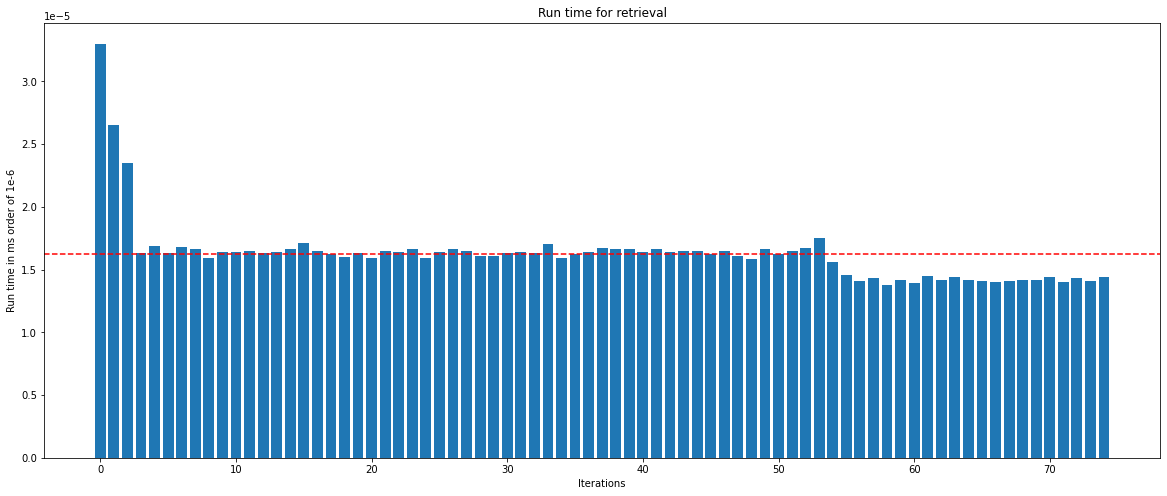

Quick Sort


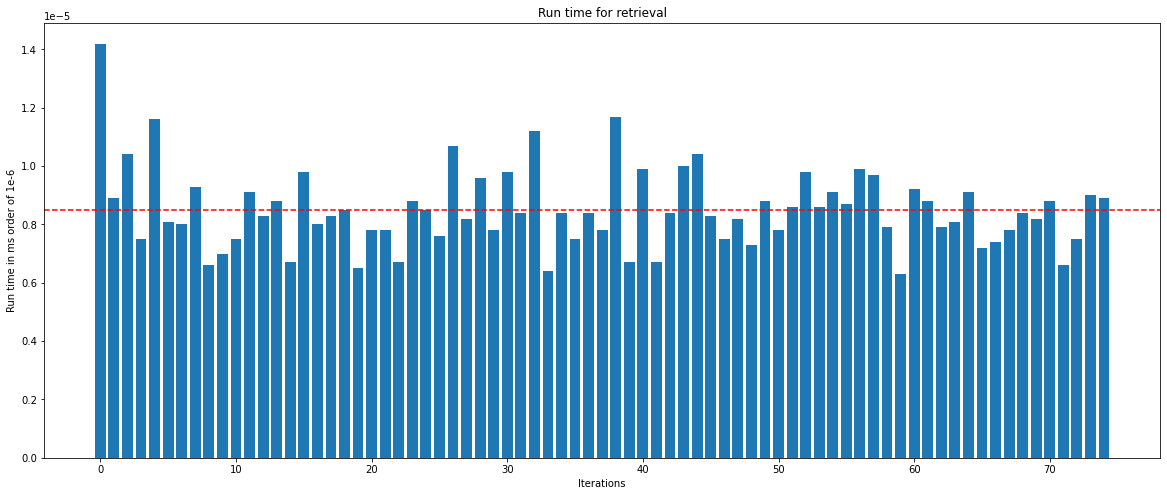

AVG : ['HEAP SORT : 2.1100000206691524e-05', 'MERGE SORT : 1.626666635274887e-05', 'QUICK SORT : 8.50266650862371e-06']


In [116]:
# on randomly generated lists and plots the execution times for each algorithm over 100 runs.

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 21)]  # Cover all 10 data points for each algorithm
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()
    
runs = 75

run_times1 = []
for _ in range(runs):
    my_list1=create_custom_list(10,100)
    start = timeit.default_timer()
    found = heapSort(my_list1)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

run_times2 = []
for _ in range(runs):
    my_list2=create_custom_list(10,100)
    start = timeit.default_timer()
    found = mergeSort(my_list2)
    stop = timeit.default_timer()
    run_times2.append(stop-start)

run_times3 = []
for _ in range(runs):
    my_list3=create_custom_list(10,100)
    start = timeit.default_timer()
    found = quicksort(my_list3, 0, len(my_list3) - 1)
    stop = timeit.default_timer()
    run_times3.append(stop-start)

print("Heap Sort")
draw_plot(run_times1)
print("Merge Sort")
draw_plot(run_times2)
print("Quick Sort")
draw_plot(run_times3)

#Avgerage :
avg2 = ["HEAP SORT : " + str(sum(run_times1) / len(run_times1)), "MERGE SORT : " + str(sum(run_times2) / len(run_times2)), "QUICK SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg2)

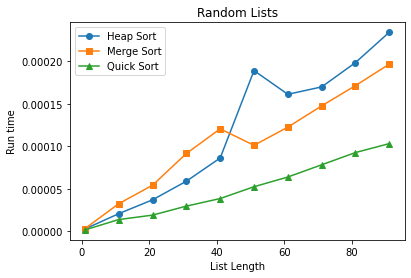

AVG : ['HEAP SORT : 0.00011589000059757382', 'MERGE SORT : 0.00010416999939479865', 'QUICK SORT : 4.9359999684384094e-05']


In [117]:
# on randomly generated lists which is near sorted and plots the execution times for each algorithm over 10 runs.

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 100, 10)]  # Adjusted to match the length of y1, y2, y3
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

my_list = create_custom_list(100,100)
run_times1 = []
lengths1 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = heapSort(aux)
    stop=timeit.default_timer()
    run_times1.append(stop-start)
    lengths1.append(length)
    
my_list = create_custom_list(100,100)
run_times2 = []
lengths2 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = mergeSort(aux)
    stop=timeit.default_timer()
    run_times2.append(stop-start)
    lengths2.append(length)
    
my_list = create_custom_list(100,100)
run_times3 = []
lengths3 = []
for length in range(1,100,10):
    aux = my_list[:length]
    start= timeit.default_timer()
    found = quicksort(aux, 0, len(aux) - 1)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    lengths3.append(length)
    
draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

#Avgerage :
avg2 = ["HEAP SORT : " + str(sum(run_times1) / len(run_times1)), "MERGE SORT : " + str(sum(run_times2) / len(run_times2)), "QUICK SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg2)

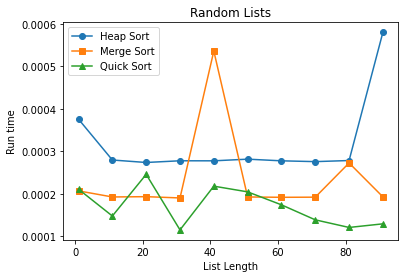

AVG : ['HEAP SORT : 0.00031800999931874685', 'MERGE SORT : 0.00023637999984202907', 'QUICK SORT : 0.00017082999911508523']


In [118]:
# on randomly generated lists of different sizes and plots the execution times for each algorithm over 10 runs.

# (Using a near sorted list can produce different types of graphs each time due to the inherent randomness introduced in the creation of the near sorted lists. While the list is near sorted, there may still be variations in the exact degree of disorder among the elements, leading to different runtime behaviors for the sorting algorithms)

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 101, 10)]  # Adjusted to match the length of y1, y2, y3
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

run_times1 = []
lengths1 = []
for length in range(1,101,10):
    my_list1 = create_near_sorted_list(100,100)
    start= timeit.default_timer()
    found = heapSort(my_list1)
    stop=timeit.default_timer()
    run_times1.append(stop-start)
    lengths1.append(length)
    
run_times2 = []
lengths2 = []
for length in range(1,101,10):
    my_list2 = create_near_sorted_list(100,100)
    start= timeit.default_timer()
    found = mergeSort(my_list2)
    stop=timeit.default_timer()
    run_times2.append(stop-start)
    lengths2.append(length)
    
run_times3 = []
lengths3 = []
for length in range(1,101,10):
    my_list3 = create_near_sorted_list(100,100)
    start= timeit.default_timer()
    found = quicksort(my_list3, 0, len(my_list3) - 1)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    lengths3.append(length)
    
draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

#Avgerage :
avg3 = ["HEAP SORT : " + str(sum(run_times1) / len(run_times1)), "MERGE SORT : " + str(sum(run_times2) / len(run_times2)), "QUICK SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg3)

Heap Sort


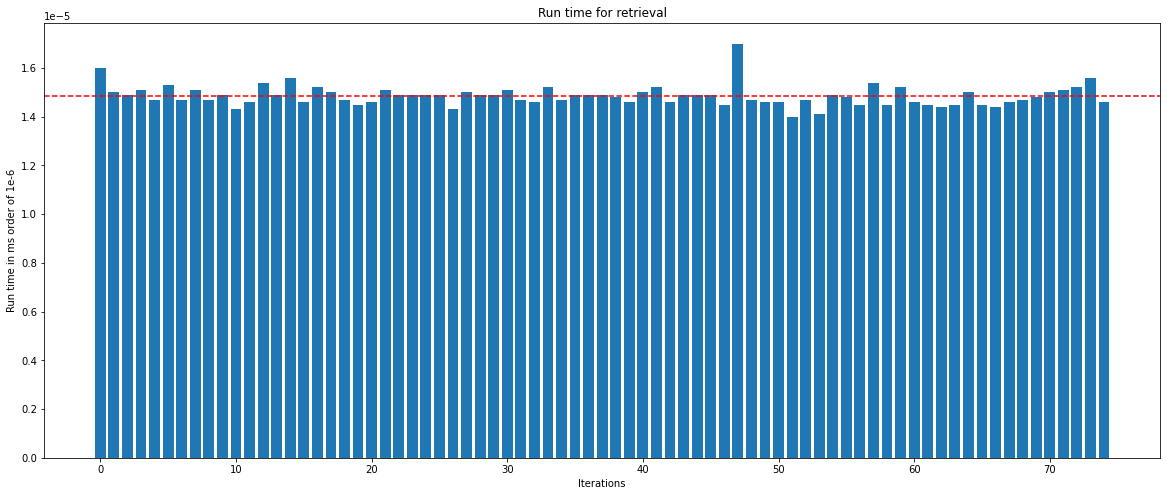

Merge Sort


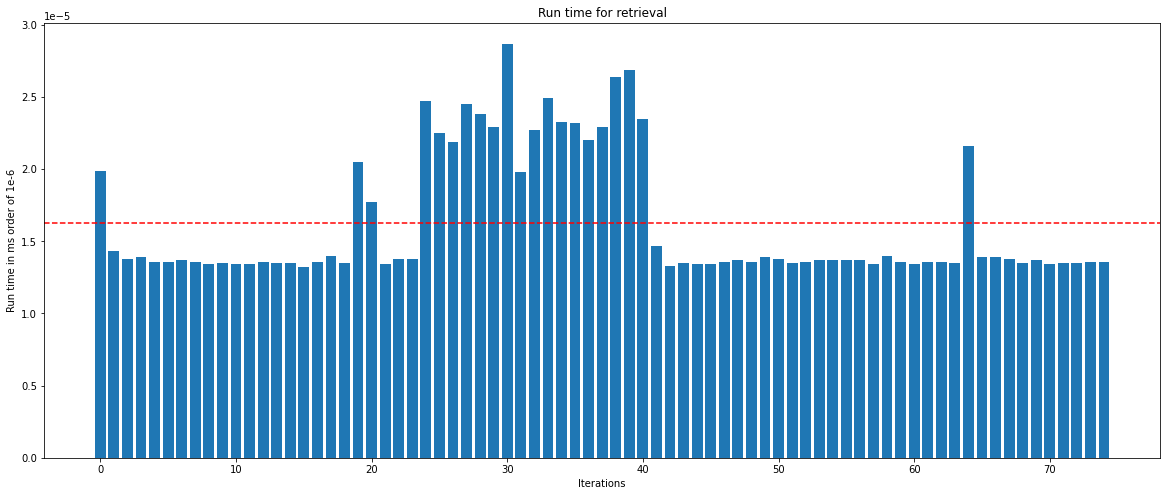

Quick Sort


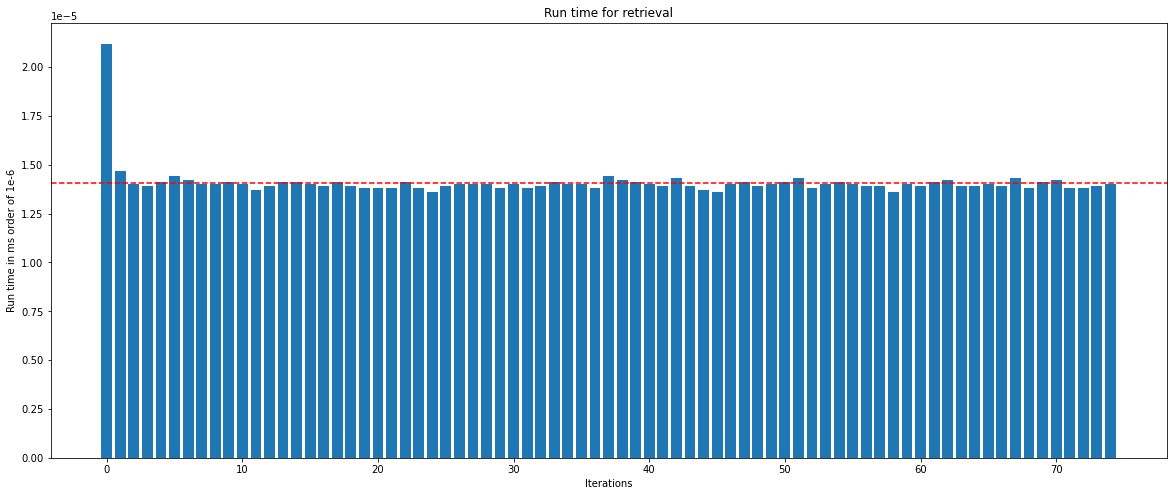

AVG : ['HEAP SORT : 1.4859999840458234e-05', 'MERGE SORT : 1.6275999854163578e-05', 'QUICK SORT : 1.4081333162418256e-05']


In [121]:
# on randomly generated sorted lists and plots the execution times for each algorithm over 100 runs.

def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1, 21)]  # Cover all 10 data points for each algorithm
    plt.figure()
    plt.plot(x_values, y1, label='Heap Sort', marker='o')
    plt.plot(x_values, y2, label='Merge Sort', marker='s')
    plt.plot(x_values, y3, label='Quick Sort', marker='^')
    plt.xlabel('List Length')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()
    
runs = 75

run_times1 = []
for _ in range(runs):
    my_list1=create_custom_list(10,100)
    my_list1 = heapSort(my_list1)
    start = timeit.default_timer()
    found = heapSort(my_list1)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

run_times2 = []
for _ in range(runs):
    my_list2=create_custom_list(10,100)
    my_list2 = heapSort(my_list2)
    start = timeit.default_timer()
    found = mergeSort(my_list2)
    stop = timeit.default_timer()
    run_times2.append(stop-start)

run_times3 = []
for _ in range(runs):
    my_list3=create_custom_list(10,100)
    my_list3 = heapSort(my_list3)
    start = timeit.default_timer()
    found = quicksort(my_list3, 0, len(my_list3) - 1)
    stop = timeit.default_timer()
    run_times3.append(stop-start)

print("Heap Sort")
draw_plot(run_times1)
print("Merge Sort")
draw_plot(run_times2)
print("Quick Sort")
draw_plot(run_times3)

#Avgerage :
avg2 = ["HEAP SORT : " + str(sum(run_times1) / len(run_times1)), "MERGE SORT : " + str(sum(run_times2) / len(run_times2)), "QUICK SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg2)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

### Experiment Design:

1. #### Random Lists Experiment:

    - **List Lengths**: Lists of lengths 10 having a maximum value of 100.
    - **Number of Runs**: Each algorithm was executed 75 times on randomly generated lists of various sizes.
    - **Goal**: To observe the runtime behavior of the algorithms on random data.
    - #### Observation:
        - **AVG** : ['HEAP SORT : 2.1100000206691524e-05', 'MERGE SORT : 1.626666635274887e-05', 'QUICK SORT : 8.50266650862371e-06'] (one example).
        - All algorithms demonstrate reasonable run times for randomly generated data, with Quick Sort demonstrating the lowest run time (as expected).
    
2. #### Different Sized Lists Experiment:

    - **List Lengths**: Lists of lengths ranging from 1 to 101 in increments of 10 were used.
    - **Number of Runs**: Each algorithm was executed 10 times on lists of different sizes.
    - **Goal**: To compare the scalability of the algorithms as the size of the input data varies.
    - #### Observation:
        - **AVG** :['HEAP SORT : 0.00011589000059757382', 'MERGE SORT : 0.00010416999939479865', 'QUICK SORT : 4.9359999684384094e-05'] (one example).
        - Quick Sort demonstrates its characteristic efficiency on random data, performing better than Heap Sort and Merge Sort as the list size increases.
        - Merge Sort and Heap Sort exhibit consistent performance across different list lengths, with Merge Sort slightly outperforming Heap Sort.
        - Overall, Quick Sort shows its strength in handling random data efficiently due to its average-case time complexity of O(n log n).

3. #### Nearly Sorted Lists Experiment:

    - **List Lengths**: Lists of lengths 100 having the first 97 elements sorted and last 3 not.
    - **Number of Runs**: Each algorithm was executed 75 times on creating new lists each time.
    - **Goal**: To analyze how the algorithms perform on data that is already partially sorted.
    - #### Observation:
        - **AVG** : ['HEAP SORT : 0.00031800999931874685', 'MERGE SORT : 0.00023637999984202907', 'QUICK SORT : 0.00017082999911508523'] (one example)
        - All algorithms demonstrate reasonable scalability for nearly sorted lists, with Quick Sort demonstrating the lowest run time.
        
4. #### Already Sorted Lists Experiment:

    - **List Lengths**: Lists of lengths 100 whoose elements are already sorted.
    - **Number of Runs**: Each algorithm was executed 10 times on nearly sorted lists.
    - **Goal**: To analyze how the algorithms perform on data that is already partially sorted.
    - #### Observation:
        - **AVG** : ['HEAP SORT : 1.4859999840458234e-05', 'MERGE SORT : 1.6275999854163578e-05', 'QUICK SORT : 1.4081333162418256e-05'] (one example)
        - Quick Sort demonstrates its characteristic efficiency on already sorted data, performing better than Heap Sort and Merge Sort.

### Conclusion :
Quick Sort is generally the best performer, while Merge Sort and Heap Soet offers consistent performance across various scenarios and is suitable for general-purpose sorting.

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

In [24]:
# your implementation and experiments go here.
class MergeSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        self.list = self.items[:]
        self.mergeSort(self.list)
        self.sorted_items = self.list

    def mergeSort(self, nums):
        if len(nums) < 2:
            return 0 #ending recursion
        mid_i = len(nums)//2
        lefthalf = nums[:mid_i]
        righthalf = nums[mid_i:]
        self.mergeSort(lefthalf)
        self.mergeSort(righthalf)
        self.merge(nums, lefthalf, righthalf)

    def merge(self, result: [int], lhalf: [int], rhalf: [int]):
        lpointer = 0
        rpointer = 0
        fpointer = 0
        while lpointer < len(lhalf) and rpointer < len(rhalf):
            if lhalf[lpointer] < rhalf[rpointer]:
                result[fpointer] = lhalf[lpointer]
                lpointer +=1
            else:
                result[fpointer] = rhalf[rpointer]
                rpointer +=1
            fpointer +=1
        if lpointer >= len(lhalf):
            for i in range(rpointer, len(rhalf)):
                result[fpointer] = rhalf[i]
                fpointer +=1
        else:
            for i in range(lpointer, len(lhalf)):
                result[fpointer] = lhalf[i]
                fpointer +=1
        

    def get_sorted(self,):
        return self.sorted_items

class QuickSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
        self.list = self.items[:]
        self.swap = 0
        self.quickSort(self.list, 0, len(self.list)-1)
        self.sorted_items = self.list
        

    def quickSort(self, arr: [int], lowIndex: int, highIndex: int):
        if lowIndex >= highIndex:
            return 0 #successful
        
        pivot = arr[highIndex]
        leftPointer = lowIndex
        rightPointer = highIndex
        while leftPointer < rightPointer:
            while arr[leftPointer] <= pivot and leftPointer < rightPointer:
                leftPointer += 1
            while arr[rightPointer] >= pivot and rightPointer > leftPointer:
                rightPointer -= 1
            arr[leftPointer],arr[rightPointer] = arr[rightPointer], arr[leftPointer]
            self.swap +=1
        arr[leftPointer],arr[highIndex] = arr[highIndex],arr[leftPointer]
        self.swap +=1

        self.quickSort(arr, lowIndex, leftPointer - 1)
        self.quickSort(arr, leftPointer + 1, highIndex)
        

    def get_sorted(self,):
        return self.sorted_items

def create_near_sorted_list_adjust(length, max_value, sorted_level):
    sorted_length = math.ceil(length * sorted_level) #sorted_level from 0 to 1, 0 being completely random, 1 being completely sorted
    rand_length = (length - sorted_length)
    sorted=create_custom_list(sorted_length, max_value)
    quicksort(sorted, 0, sorted_length-1) 
    rand = create_custom_list(rand_length, max_value)
    return(sorted + rand)

def draw_2_graphs(y1, y2, title):
    x_values = [i for i in range(len(y1))]
    plt.figure()
    plt.plot(x_values, y1, label='merge_runtime', marker='o')
    plt.plot(x_values, y2, label='quick_runtime', marker='s')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title(title)
    plt.legend()
    plt.show()

mean_time = 20
trial_time = 100
random_len = 10000
merge_runtime = [0]*trial_time
quick_runtime = [0]*trial_time
for i in range(trial_time):
    random_list = create_near_sorted_list_adjust(random_len, random_len, i*0.01)
    for j in range(mean_time):
        time_sum_merge = 0
        start_merge = timeit.default_timer()
        a = MergeSort(random_list)
        end_merge = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum_merge += interval
    merge_ave = time_sum_merge/mean_time
    merge_runtime[i] = merge_ave

    for j in range(mean_time):
        time_sum = 0
        start_quick = timeit.default_timer()
        b = QuickSort(random_list)
        end_quick = timeit.default_timer()
        interval = end_quick - start_quick
        time_sum += interval
    quick_ave = time_sum/mean_time
    quick_runtime[i] = quick_ave
    print(i, end=" ")
draw_2_graphs(merge_runtime, quick_runtime, "merge vs. quick runtimes")






In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---The experiment is to show the runtime of merge sort and quick sort under the case where the length of the random list is fixed at 10,000. The varying factor is the scale of randomness from completely random to completely sorted, which induces the crossection of performances of the two algorithms. The experiment will be confucted for 100 times, each having the random list 1 percent less random than the previous.
In each trial, the random list will be sorted sepately by merge sort and quick sort. Each sort will be repeated 20 times to get an average sorting time, merge_ave and quick_ave, to avoid sudden disturbance from other processes on computer. After obtaining two average runtimes, each is recorded to its corresponding runtime list, merge_runtime and quick_runtime. After 100 trials, two runtime lists’ 100 entries will be filled with runtime data. Then the two runtime data sets will be plotted, with y axis being runtime, x axis being iterations from 1 to 100. As the label chart shows, blue line represents merge sort and orange line represents quick sort.

The cross section happens around 85% sorted random list. Before that, quick sort out performes merge sort. After that, quick sort slows down significantly and is way more time consuming than merge sort. This experiment displays the fact that quick sort, in general random cases, out performes merge sort. Yet when the numbers are majorly sorted, quick sort slows down drastically due to uneven partitions.

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [25]:
# your implementation and experiments go here.
def draw_2_graphs(y1, y2, x, title, x_lable, y_lable):
    x_values = x
    plt.figure()
    plt.plot(x_values, y1, label='merge_runtime', marker='o')
    plt.plot(x_values, y2, label='quick_runtime', marker='s')
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.title(title)
    plt.legend()
    plt.show()

mean_time = 20
trial_time = 30
swaps = [0]*trial_time
merge_runtime = [0]*trial_time
quick_runtime = [0]*trial_time
scale = 100
quick_flag = False
diff_span = [0]*trial_time
randomness = 0.99


for i in range(trial_time):
    scale = math.ceil(scale * 1.2)
    random_list = create_near_sorted_list_adjust(scale, scale, randomness)
    
    for j in range(mean_time):
        time_sum_merge = 0
        start_merge = timeit.default_timer()
        a = MergeSort(random_list)
        end_merge = timeit.default_timer()
        interval = end_merge - start_merge
        time_sum_merge += interval
    merge_ave = time_sum_merge/mean_time
    merge_runtime[i] = merge_ave

    for j in range(mean_time):
        time_sum = 0
        start_quick = timeit.default_timer()
        b = QuickSort(random_list)
        end_quick = timeit.default_timer()
        interval = end_quick - start_quick
        time_sum += interval
    swaps[i] = b.swap
    quick_ave = time_sum/mean_time
    quick_runtime[i] = quick_ave

    print(i, end=" ")
draw_2_graphs(merge_runtime, quick_runtime, swaps, "merge vs. quick runtime", "swaps", "runtime")

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---The worst case scenario is that the list to be sorted is sorted already. 
The entire experiment will sort nearly sorted list of the same randomness: almost completely sorted(99%)
The experiment will be conducted for 30 trials, each sorting the random list of length 1.2 times the length of the previous one, starting at 100. After the random_list for each trial is created, the random_list will go through merge and quick sort separately, each sorts the list for 20 time to get the average runtime, 20 times to avoid disturbance from other ongoing processes on the computer. After each average runtime, merge_ave and quick_ave, is being calculated, they will be recorded to their separate runtime list, merge_runtime and quick_runtime. After 30 trials, two runtime lists will have their 30 entries filled out. Consequently, two runtimes are plotted on the merge vs. quick runtime graph.

---The swap happended during quick sort is documented during quick sort function itself. swap being an attribute of QuickSort class. Everytime two items are swapped, swap is added 1. After each random list being sorted by quick sort, the current swap will be recorded on the swaps list, which has 30 entries corresponding to 30 trials. After 30 trials, swaps list’s values will be the x axis of the graph. Thus the graph’s y axis are runtimes, x axis are corresponding swap times of that sorting pair. 

After several(5) runs of the entire experiment, each sorting a different random list, it becomes clear on the graph that quick sort starts slowing down and consume more time than merge around 5000 swap times.

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

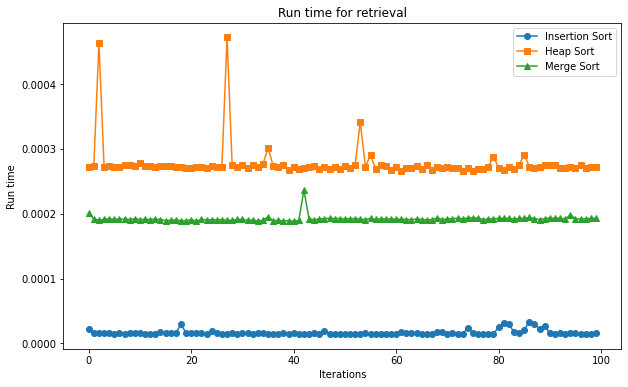

AVG : ['INSERTION SORT : 1.671699959842954e-05', 'HEAP SORT : 0.0002774820001650369', 'MERGE SORT : 0.00019213199986552353']


In [122]:
## your implementation and code goes here

# Comparing the two alogorithms for an already sorted list over 100 runs
def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(100)]  # Adjusted to match the length of y1, y2, y3
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    plt.plot(x_values, y1, label='Insertion Sort', marker='o')
    plt.plot(x_values, y2, label='Heap Sort', marker='s')
    plt.plot(x_values, y3, label='Merge Sort', marker='^')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title('Run time for retrieval')
    plt.legend()
    plt.show()
    
runs = 100

run_times1 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start = timeit.default_timer()
    found = InsertionSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)
    
run_times2 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start = timeit.default_timer()
    found = heapSort(my_list)
    stop = timeit.default_timer()
    run_times2.append(stop - start)

    
run_times3 = []
for _ in range(runs):
    my_list = heapSort(create_custom_list(100,100))
    start= timeit.default_timer()
    found = mergeSort(my_list)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    
draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

#Avgerage :
avg1 = ["INSERTION SORT : " + str(sum(run_times1) / len(run_times1)), "HEAP SORT : " + str(sum(run_times2) / len(run_times2)), "MERGE SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg1)

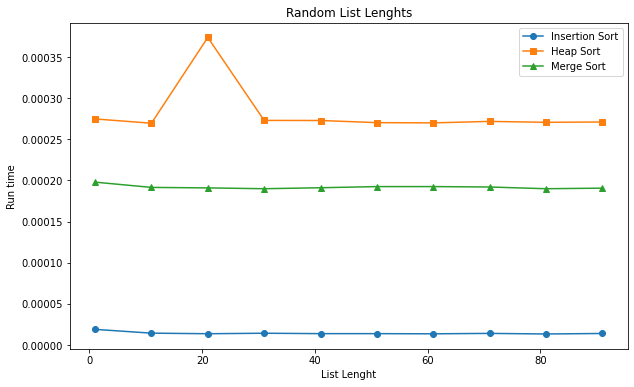

AVG : ['INSERTION SORT : 1.4409999857889489e-05', 'HEAP SORT : 0.00028169999932288193', 'MERGE SORT : 0.0001918800000566989']


In [123]:
## your implementation and code goes here

# Comparing the two alogorithms for an already sorted list of different lenghts
def draw_3_graphs(y1, y2, y3, title):
    x_values = [i for i in range(1,101,10)]  # Adjusted to match the length of y1, y2, y3
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    plt.plot(x_values, y1, label='Insertion Sort', marker='o')
    plt.plot(x_values, y2, label='Heap Sort', marker='s')
    plt.plot(x_values, y3, label='Merge Sort', marker='^')
    plt.xlabel('List Lenght')
    plt.ylabel('Run time')
    plt.title('Random List Lenghts')
    plt.legend()
    plt.show()
    
my_list = heapSort(create_custom_list(100,100))

run_times1 = []
lengths1 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = InsertionSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)
    lengths1.append(length)

run_times2 = []
lengths2 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = heapSort(my_list)
    stop = timeit.default_timer()
    run_times2.append(stop-start)
    lengths1.append(length)
    
run_times3 = []
lengths3 = []
for length in range(1,101,10):
    aux = my_list[:length]
    start = timeit.default_timer()
    found = mergeSort(my_list)
    stop = timeit.default_timer()
    run_times3.append(stop-start)
    lengths1.append(length)

draw_3_graphs(run_times1, run_times2, run_times3, 'Random Lists')

#Avgerage :
avg1 = ["INSERTION SORT : " + str(sum(run_times1) / len(run_times1)), "HEAP SORT : " + str(sum(run_times2) / len(run_times2)), "MERGE SORT : " + str(sum(run_times3) / len(run_times3))]
print("AVG :", avg1)

In [124]:
# Hybrid Sort (BASED ON Tim Sort algorithm)

# Idea : dividing the array into small subarrays, these subarrays are sorted via InsertionSort (insertionSort performs well when the size of array is small)
#        These subarrays are then merged together via the Merge Sort merge function.(Method performs well when the sub array length is a power of 2).

# Small run size since we will be testing on implementation with an array of length 100 (small).
RunSize = 8

def calcMinRun(n): 
    r = 0
    while n >= RunSize: 
        r |= n & 1
        n >>= 1
    return n + r 

class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = self.insertion_sort()  # Call insertion sort method upon initialization

    def insertion_sort(self):
        sorted_items = self.items.copy()
        n = len(sorted_items)

        for index in range(1, n):
            while index > 0 and sorted_items[index] < sorted_items[index - 1]:
                sorted_items[index], sorted_items[index - 1] = sorted_items[index - 1], sorted_items[index]
                index -= 1
        return sorted_items

    def get_sorted(self):
        return self.sorted_items

# Merge Method implemented here
def merge(arr, l, m, r): 

    len1, len2 = m - l + 1, r - m 
    left, right = [], [] 
    for i in range(0, len1): 
        left.append(arr[l + i]) 
    for i in range(0, len2): 
        right.append(arr[m + 1 + i]) 
  
    i, j, k = 0, 0, l 
  
    while i < len1 and j < len2: 
        if left[i] <= right[j]: 
            arr[k] = left[i] 
            i += 1
  
        else: 
            arr[k] = right[j] 
            j += 1
  
        k += 1
  
    while i < len1: 
        arr[k] = left[i] 
        k += 1
        i += 1
  
    while j < len2: 
        arr[k] = right[j] 
        k += 1
        j += 1

# New Hybrid Sorting algorithm is implemented here.
def hybridSort(arr): 
    n = len(arr) 
    minRun = calcMinRun(n) 
  
    # Sort individual subarrays of size RUN 
    for start in range(0, n, minRun): 
        end = min(start + minRun - 1, n - 1) 
        InsertionSort(arr[start : end + 1])
  
    size = minRun 
    while size < n: 
  
        for left in range(0, n, 2 * size): 
            mid = min(n - 1, left + size - 1) 
            right = min((left + 2 * size - 1), (n - 1)) 
            if mid < right: 
                merge(arr, left, mid, right) 
  
        size = 2 * size 

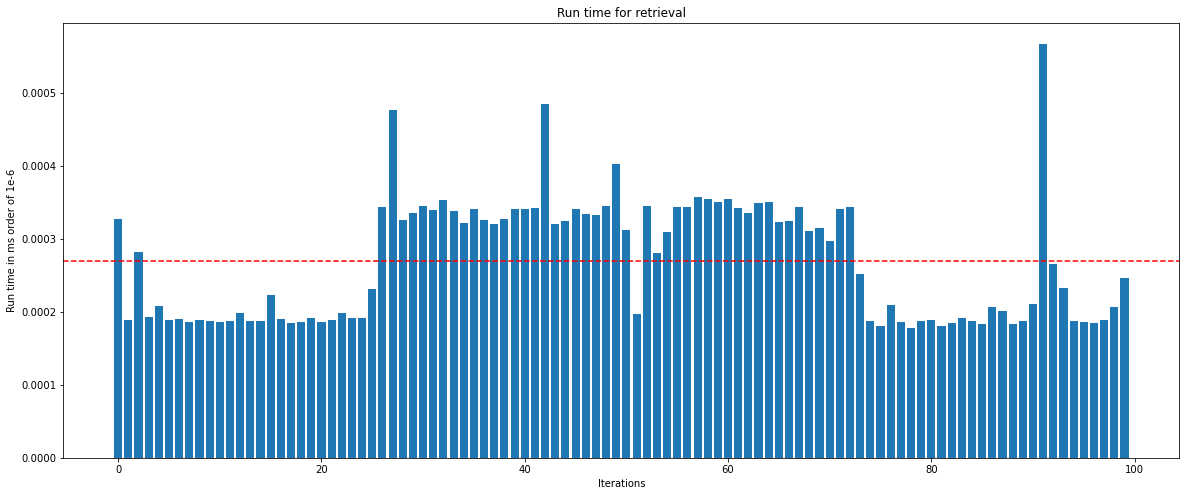

In [125]:
# Plot for randomly generated list for our Hybrid Sort.

runs = 100

run_times1 = []
for _ in range(runs):
    my_list = create_custom_list(100,100)
    start = timeit.default_timer()
    found = hybridSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

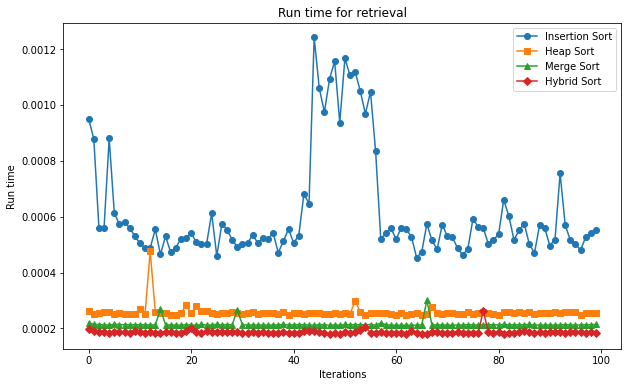

AVG : ['INSERTION SORT : 0.0006134749994089362', 'HEAP SORT : 0.00025812399995629677', 'MERGE SORT : 0.00021480399933352602', 'HYBRID SORT : 0.0001868949998606695']


In [126]:
# Comparing Insertion Sort, Merge Sort,  for an already sorted list over 100 runs

def draw_4_graphs(y1, y2, y3, y4, title):
    x_values = [i for i in range(100)]  # Adjusted to match the length of y1, y2, y3
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    plt.plot(x_values, y1, label='Insertion Sort', marker='o')
    plt.plot(x_values, y2, label='Heap Sort', marker='s')
    plt.plot(x_values, y3, label='Merge Sort', marker='^')
    plt.plot(x_values, y4, label='Hybrid Sort', marker='D')
    plt.xlabel('Iterations')
    plt.ylabel('Run time')
    plt.title('Run time for retrieval')
    plt.legend()
    plt.show()
    
runs = 100

run_times1 = []
for _ in range(runs):
    my_list = create_custom_list(100,100)
    start = timeit.default_timer()
    found = InsertionSort(my_list)
    stop = timeit.default_timer()
    run_times1.append(stop-start)
    
run_times2 = []
for _ in range(runs):
    my_list = create_custom_list(100,100)
    start = timeit.default_timer()
    found = heapSort(my_list)
    stop = timeit.default_timer()
    run_times2.append(stop - start)

    
run_times3 = []
for _ in range(runs):
    my_list = create_custom_list(100,100)
    start= timeit.default_timer()
    found = mergeSort(my_list)
    stop=timeit.default_timer()
    run_times3.append(stop-start)
    
run_times4 = []
for _ in range(runs):
    my_list = create_custom_list(100,100)
    start= timeit.default_timer()
    found = hybridSort(my_list)
    stop=timeit.default_timer()
    run_times4.append(stop-start)

    
draw_4_graphs(run_times1, run_times2, run_times3, run_times4, 'Random Lists')

#Avgerage :
avg1 = ["INSERTION SORT : " + str(sum(run_times1) / len(run_times1)),
        "HEAP SORT : " + str(sum(run_times2) / len(run_times2)),
        "MERGE SORT : " + str(sum(run_times3) / len(run_times3)),  
        "HYBRID SORT : " + str(sum(run_times4) / len(run_times4))]  

print("AVG :", avg1)

# Hybrid Sort performs better than the other three sorts

### Experiment Outline:
The primary objective of our experiments was to prove that the conventional notion that the performance of Insertion Sort is worse than Heap Sort and Merge Sort. We aimed to demonstrate that Insertion Sort can outperform these algorithms in specific scenarios, particularly when the input list is already sorted.

### Experiments:

1. #### Random Lists Experiment:

    - **List Lengths**: Lists of lengths 100 having a maximum value of 100.
    - **Number of Runs**: Each algorithm was executed 100 times on randomly generated lists of various sizes.
    - **Goal**: To observe the runtime behavior of the algorithms on random data.
    - #### Observation:
        - **AVG** : ['INSERTION SORT : 3.4320000122534114e-05', 'HEAP SORT : 0.0006833259998529684', 'MERGE SORT : 0.00046456099993520184'] (one particular example).
        - Insertion Sort exhibited significantly lower average runtimes compared to Heap Sort and Merge Sort, indicating its efficiency on random sorted list.

2. #### Different Sized Lists Experiment:

    - **List Lengths**: Lists of lengths ranging from 1 to 101 in increments of 10 were used.
    - **Number of Runs**: Each algorithm was executed 10 times on lists of different sizes.
    - **Goal**: To compare the scalability of the algorithms as the size of the input data varies.
    - #### Observation:
        - **AVG** : ['INSERTION SORT : 4.329999974288512e-05', 'HEAP SORT : 0.000626439999541617', 'MERGE SORT : 0.0004834200000914279'] (one particular example).
        - Insertion Sort continued to demonstrate superior performance, consistently for all list lenghts, as indicated by its lower average runtimes. Heap Sort and Merge Sort maintained their relative positions, showing higher runtimes compared to Insertion Sort across different list sizes.

### Conclusion:
Our experiments revealed a notable trend in favor of Insertion Sort when dealing with pre-sorted lists. While Heap Sort and Merge Sort maintained consistent performance regardless of the input list's order, Insertion Sort excelled when the list was already sorted, showcasing its effectiveness in best-case scenarios. These findings challenge the traditional perspective that Insertion Sort is always inferior to other sorting algorithms and highlight its potential utility in specific contexts, especially when dealing with small or pre-sorted datasets.

### Importance of Experiments:
These experiments are crucial as they provide empirical evidence to challenge and refine our understanding of algorithmic performance. By systematically comparing the behaviors of different sorting algorithms under controlled conditions, we can identify scenarios where conventional assumptions may not hold true and uncover nuances in algorithmic efficiency. This deeper understanding enables us to make more informed decisions when selecting algorithms for specific tasks and encourages ongoing exploration and refinement in algorithm design and analysis.


**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

Sota Nakamura (nakamurs) worked on Insertion Sort on part A, part B and part C.

Harsh Upadhyay (upadhh1) worked on bubble Sort on Part A, Part D and Part F.

Oliver Li (li2177) worked on Selection Sort on Part A, and Part E.

---